<center><img src="trainers.jpg" alt="Trainers in a store" width=550></center>

Sports clothing and athleisure attire is a huge industry, worth approximately $193 billion in 2021 with a strong growth forecast over the next decade! (`Source: https://www.statista.com/statistics/254489/total-revenue-of-the-global-sports-apparel-market/`)

In this workbook, you will undertake the role of a product analyst for an online sports clothing company. The company is specifically interested in how it can improve revenue. You will dive into product data such as pricing, reviews, descriptions, and ratings, as well as revenue and website traffic, to produce recommendations for its marketing and sales teams.  

### The data:
You've been provided with four datasets to investigate:

`brands.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `brand` | Brand of the product | 

`finance.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `listing_price` | Original price of the product | 
| `sale_price` | Discounted price of the product |
| `discount` | Discount off the listing price, as a decimal | 
| `revenue` | Revenue generated by the product |

`info.csv`

| Columns | Description |
|---------|-------------|
| `product_name` | Name of the product | 
| `product_id` | Unique product identifier |
| `description` | Description of the product |

`reviews.csv`

| Columns | Description |
|---------|-------------|
| `product_id` | Unique product identifier |
| `rating` | Average product rating | 
| `reviews` | Number of reviews for the product |

In [3]:
import pandas as pd 

brands =pd.read_csv('brands.csv')
finance = pd.read_csv('finance.csv')
info = pd.read_csv('info.csv')
reviews = pd.read_csv('reviews.csv')


In [5]:
brands.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3179 entries, 0 to 3178
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   product_id  3179 non-null   object
 1   brand       3120 non-null   object
dtypes: object(2)
memory usage: 49.8+ KB


In [8]:
merged_df = info.merge(finance , on="product_id")
merged_df = merged_df.merge(reviews , on = 'product_id')
merged_df = merged_df.merge(brands , on = 'product_id')

In [10]:
merged_df.head()
merged_df.dropna(inplace= True)

In [11]:
merged_df.head()

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,brand
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Adidas
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Adidas
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Adidas
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Adidas
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,Adidas


In [13]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3117 entries, 1 to 3178
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   product_name   3117 non-null   object 
 1   product_id     3117 non-null   object 
 2   description    3117 non-null   object 
 3   listing_price  3117 non-null   float64
 4   sale_price     3117 non-null   float64
 5   discount       3117 non-null   float64
 6   revenue        3117 non-null   float64
 7   rating         3117 non-null   float64
 8   reviews        3117 non-null   float64
 9   brand          3117 non-null   object 
dtypes: float64(6), object(4)
memory usage: 267.9+ KB


In [14]:
merged_df['label_price'] = pd.qcut(merged_df['listing_price'],q=4,labels=["Budget", "Average", "Expensive", "Elite"])
merged_df.head()

,product_name,product_id,description,listing_price,sale_price,discount,revenue,rating,reviews,brand,label_price
1,Women's adidas Originals Sleek Shoes,G27341,"A modern take on adidas sport heritage, tailor...",75.99,37.99,0.5,1641.17,3.3,24.0,Adidas,Expensive
2,Women's adidas Swim Puka Slippers,CM0081,These adidas Puka slippers for women's come wi...,9.99,5.99,0.4,398.93,2.6,37.0,Adidas,Budget
3,Women's adidas Sport Inspired Questar Ride Shoes,B44832,"Inspired by modern tech runners, these women's...",69.99,34.99,0.5,2204.37,4.1,35.0,Adidas,Expensive
4,Women's adidas Originals Taekwondo Shoes,D98205,This design is inspired by vintage Taekwondo s...,79.99,39.99,0.5,5182.70,3.5,72.0,Adidas,Expensive
5,Women's adidas Sport Inspired Duramo Lite 2.0 ...,B75586,Refine your interval training in these women's...,47.99,19.20,0.6,1555.20,1.0,45.0,Adidas,Average


In [16]:
adidas_vs_nike = merged_df.groupby(['brand','label_price'],as_index=False).agg(
    num_products = ('label_price','count'),
    mean_revenue = ('revenue','mean')
    ).round(2)


C:\Users\Hp\AppData\Local\Temp\ipykernel_11828\3253180544.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  adidas_vs_nike = merged_df.groupby(['brand','label_price'],as_index=False).agg(


In [17]:
print(adidas_vs_nike)

    brand label_price  num_products  mean_revenue
0  Adidas      Budget           574       2015.68
1  Adidas     Average           655       3035.30
2  Adidas   Expensive           759       4621.56
3  Adidas       Elite           587       8302.78
4    Nike      Budget           357       1596.33
5    Nike     Average             8        675.59
6    Nike   Expensive            47        500.56
7    Nike       Elite           130       1367.45


In [18]:
merged_df['description_length'] = merged_df['description'].str.len()

In [20]:
length = [0,100,200,300,400,500,600,700]
labels = ["100","200","300","400","500","600","700"]
merged_df['description_length'] = pd.cut(merged_df['description_length'],bins=length,labels=labels,)

In [24]:
# Group by the bins
description_lengths = merged_df.groupby('description_length',as_index=False).agg(
    mean_rating = ('rating' , "mean") ,
    total_reviews = ('reviews',"sum")
).round(2)

print(description_lengths)

  description_length  mean_rating  total_reviews
0                100         2.26           36.0
1                200         3.19        17719.0
2                300         3.28        76115.0
3                400         3.29        28994.0
4                500         3.35         4984.0
5                600         3.12          852.0
6                700         3.65          818.0


C:\Users\Hp\AppData\Local\Temp\ipykernel_11828\29327642.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  description_lengths = merged_df.groupby('description_length',as_index=False).agg(


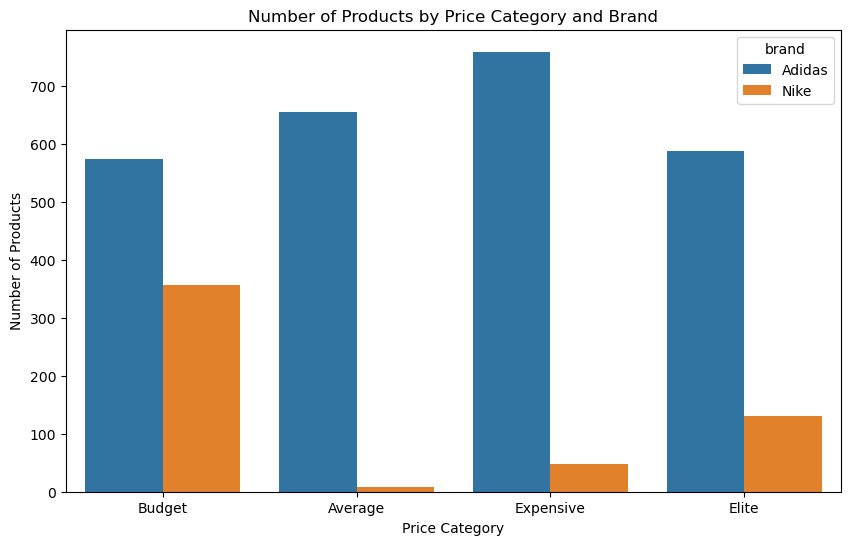

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.figure(figsize=(10,6))
sns.countplot(data=merged_df,x='label_price',hue='brand')
plt.title('Number of Products by Price Category and Brand')
plt.xlabel('Price Category')
plt.ylabel('Number of Products')
plt.show()